In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import json
import pprint

#use linregplot to easily generate a scatterplot with linear regression line and formula from a dataframe - linregplot(dataframe, column name for x, column name for y, x axis label, y axis label)
from scatterplot_generator import linregplot

# Import API key
from api_keys import api_key

In [4]:
# read in csv
oscar_data= pd.read_csv("Resources/oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]


#Can we do all nominees in every category just for one year as well?

In [ ]:
# create empty lists for movie ids, titles, votes, and release dates.
'''movie_ids = []
titles = []
votes = []
release_dates = []
# "for loop" to loop through each page of the response json.
for i in range(1,int(total_pages)+1):
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}&page={i}').json()
 # second "for loop" to loop through the page, retrieve all the necessary info, and append to the empty lists
    for i in range(len(all_movies_response["results"])):

        movie_id = all_movies_response["results"][i]["id"]
        title = all_movies_response["results"][i]["original_title"]
        vote = all_movies_response["results"][i]["vote_average"]
        release_date = all_movies_response["results"][i]["release_date"]

        movie_ids.append(movie_id)
        titles.append(title)
        votes.append(vote)
        release_dates.append(release_date)'''

In [6]:
base_url = "https://api.themoviedb.org/3/"

#for testing purposes:
'''total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)
print(int(total_pages))'''

'total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)\nprint(int(total_pages))'

In [7]:
responseid = {'Title' : [],'ID' : [], 'Vote Average' : [], 'Release Date' : []}

#Request from API for each month (january below)
for i in range(11):

#EDIT DATES FOR DIFFERENT YEARS
    startdate = f"2022-{i+1}-01"
    enddate = f"2022-{i+2}-01"
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()
    
    #puts all results from first page (most popular releases) into a dictionary
    for i in range(20):
        responseid['Title'].append(all_movies_response["results"][i]["title"])
        responseid['ID'].append(all_movies_response["results"][i]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][i]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][i]["release_date"])

#EDIT DATES FOR DIFFERENT YEARS
        
#Take the last month of the previous year as Oscar Noms open late in year before
startdate = "2021-12-01"
enddate = "2022-01-01"
all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()

for i in range(20):
        responseid['Title'].append(all_movies_response["results"][i]["title"])
        responseid['ID'].append(all_movies_response["results"][i]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][i]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][i]["release_date"])

        

In [99]:
#dictionary to dataframe, sorted and prepped for use

input_format = '%Y-%m-%d'
moviedata = pd.DataFrame(responseid)
# input string

moviedata['Release Date'] = pd.to_datetime(moviedata['Release Date'], utc=True)

moviedata['Release Date UNIX'] = moviedata['Release Date'].astype(np.int64)

moviedata = moviedata.sort_values("Release Date")
#moviedata['Release Date UNIX'] = (moviedata['Release Date'] - datetime(1970,1,1)).total_seconds()
moviedata['Day'] = moviedata['Release Date'].dt.day
moviedata['Month'] = moviedata['Release Date'].dt.month
moviedata['Year'] = moviedata['Release Date'].dt.year
moviedata = moviedata.reset_index(drop=True)

moviedata["Nominated"] = ""
moviedata

,Title,ID,Vote Average,Release Date,Release Date UNIX,Day,Month,Year,Nominated
0,Sing 2,438695,7.877,2021-12-01 00:00:00+00:00,1638316800000000000,1,12,2021,
1,Nightmare Alley,597208,6.993,2021-12-02 00:00:00+00:00,1638403200000000000,2,12,2021,
2,Wolf,673121,5.157,2021-12-03 00:00:00+00:00,1638489600000000000,3,12,2021,
3,Back to the Outback,770254,7.741,2021-12-03 00:00:00+00:00,1638489600000000000,3,12,2021,
4,Diary of a Wimpy Kid,774741,6.240,2021-12-03 00:00:00+00:00,1638489600000000000,3,12,2021,
...,...,...,...,...,...,...,...,...,...
235,Strange World,877269,6.358,2022-11-23 00:00:00+00:00,1669161600000000000,23,11,2022,
236,The Guardians of the Galaxy Holiday Special,774752,7.188,2022-11-25 00:00:00+00:00,1669334400000000000,25,11,2022,
237,Roald Dahl's Matilda the Musical,668482,6.779,2022-11-25 00:00:00+00:00,1669334400000000000,25,11,2022,
238,Violent Night,899112,7.375,2022-11-30 00:00:00+00:00,1669766400000000000,30,11,2022,


In [ ]:
'''len(movie_ids)'''

In [ ]:
'''df = pd.DataFrame({"ID" : movie_ids,
                   "Title" : titles,
                   "Vote" : votes,
                   "Release Date" : release_dates})
df'''

In [ ]:
'''df = df.sort_values("Release Date")
df = df.reset_index(drop=True)
df["Nominated"] = ""
df'''

In [18]:
# how to get the winner/nominees for a given year. Could use this code or something like it later.

nominees = all_nominees.loc[all_nominees["Year"] == "2022",["Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]


The r-value is: 0.10038848294881089


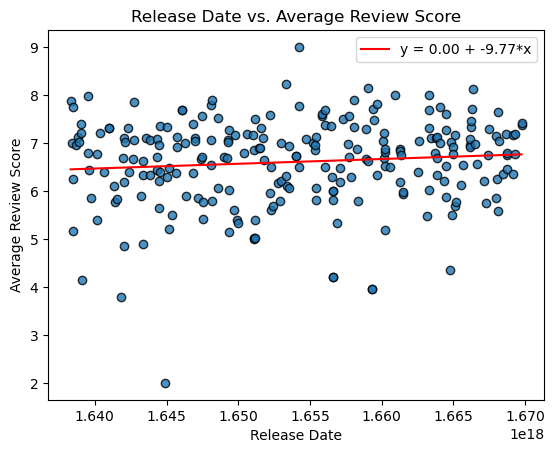

In [102]:
linregplot(moviedata, 'Release Date UNIX', 'Vote Average', 'Release Date', 'Average Review Score')


# scatter plot needs work.

In [ ]:
#requests.get(f'{base_url}/movie/1159307?&api_key={api_key}').json()
